In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [26]:
data=pd.read_csv('AirPassengers.csv')
data.shape

(144, 2)

In [27]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


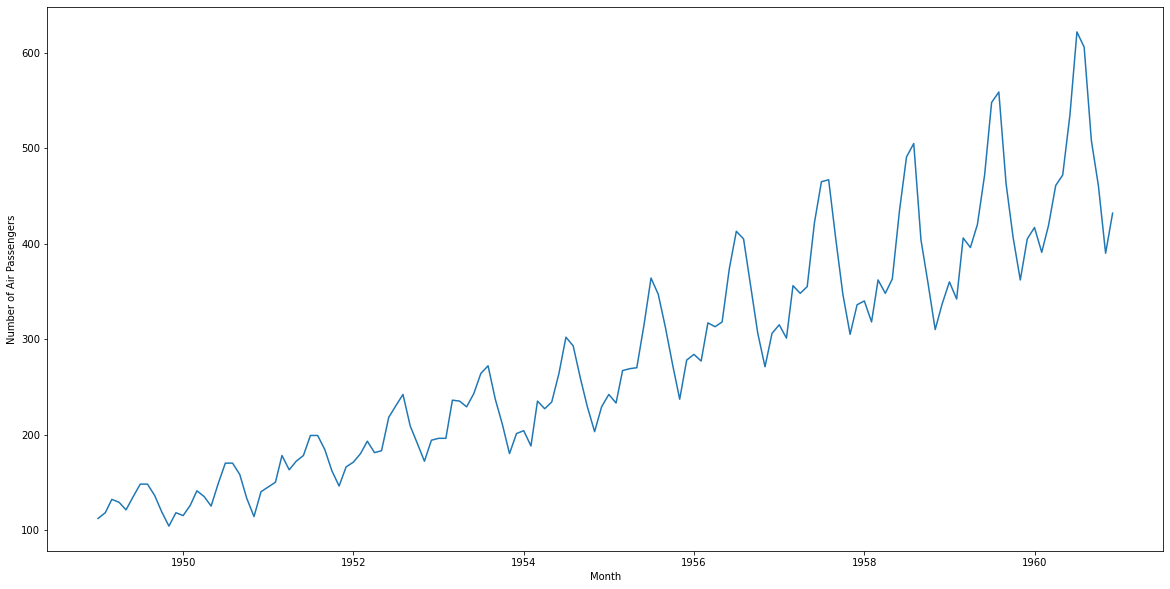

In [28]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [29]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


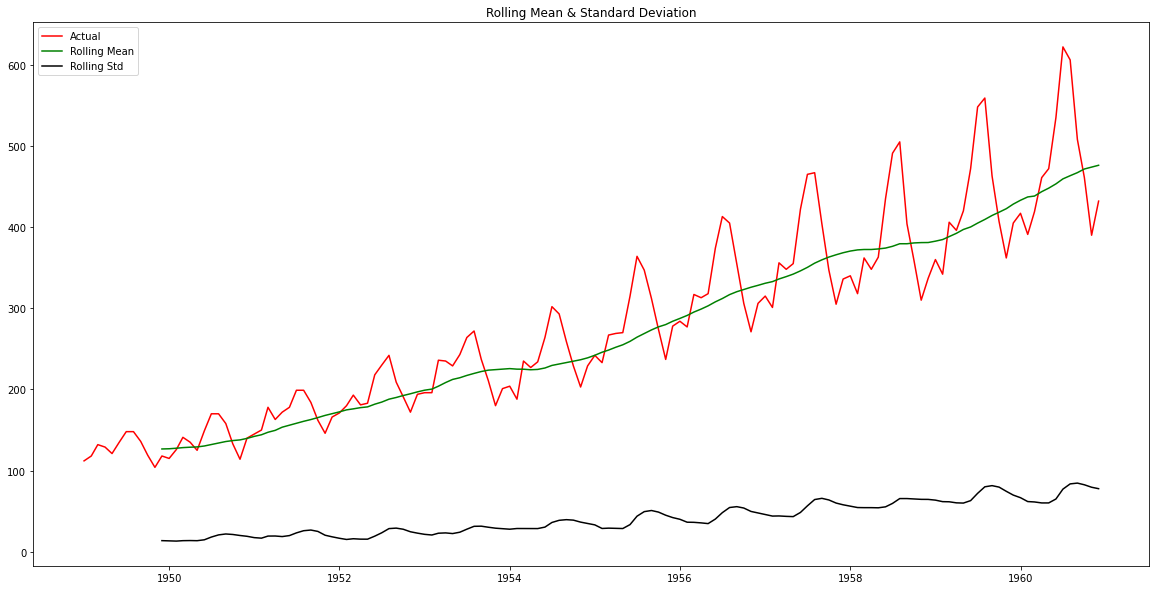

In [30]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [31]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


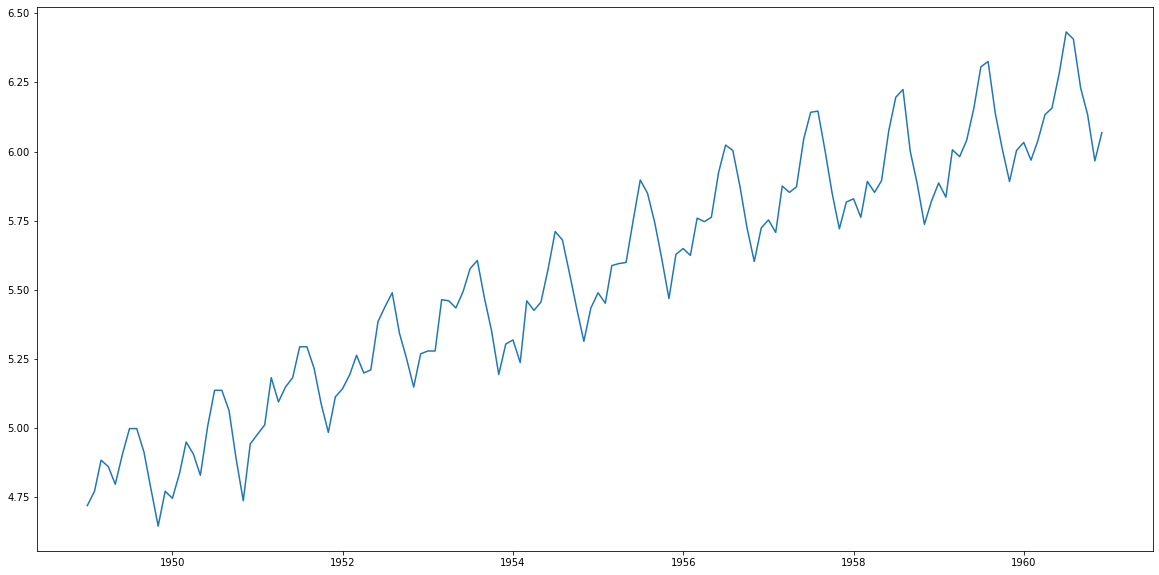

In [32]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

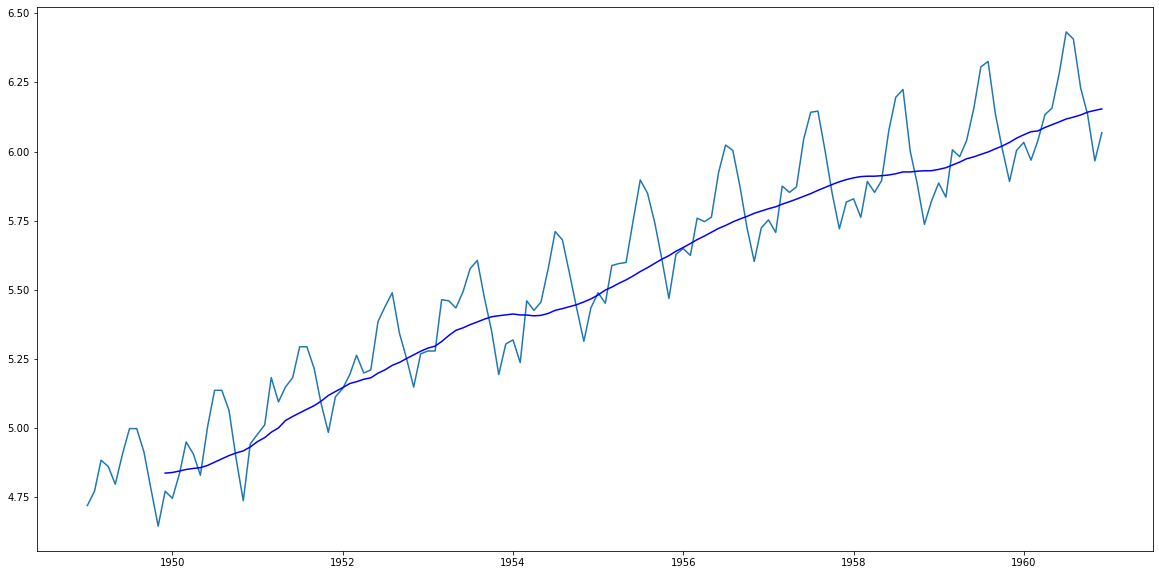

In [33]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [34]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [35]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [60]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

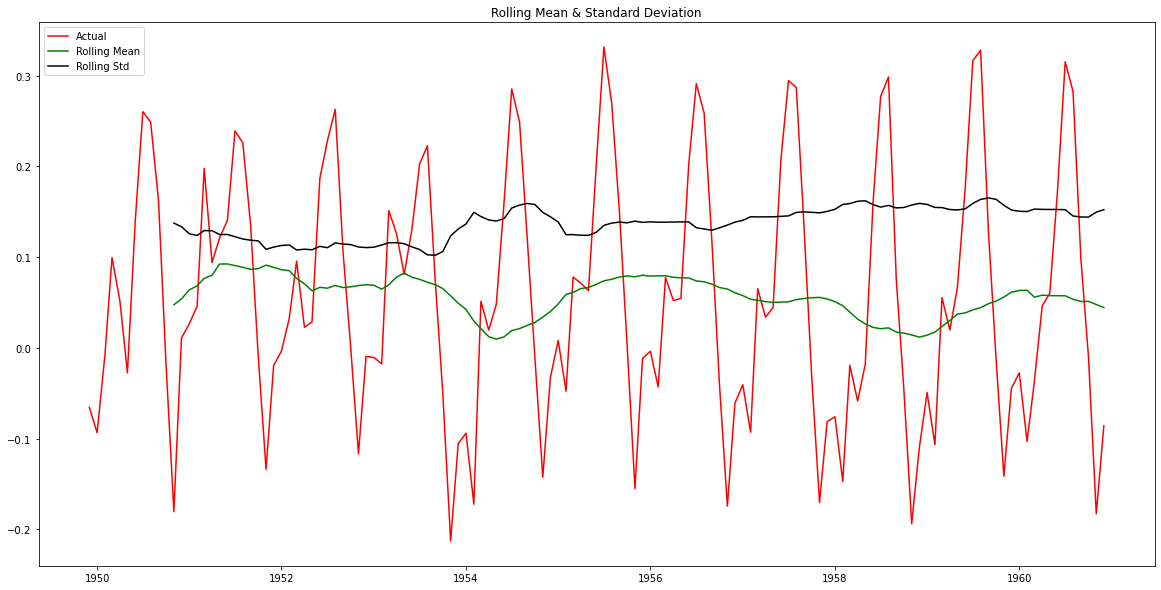

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [61]:
stationarity(data_log_diff)

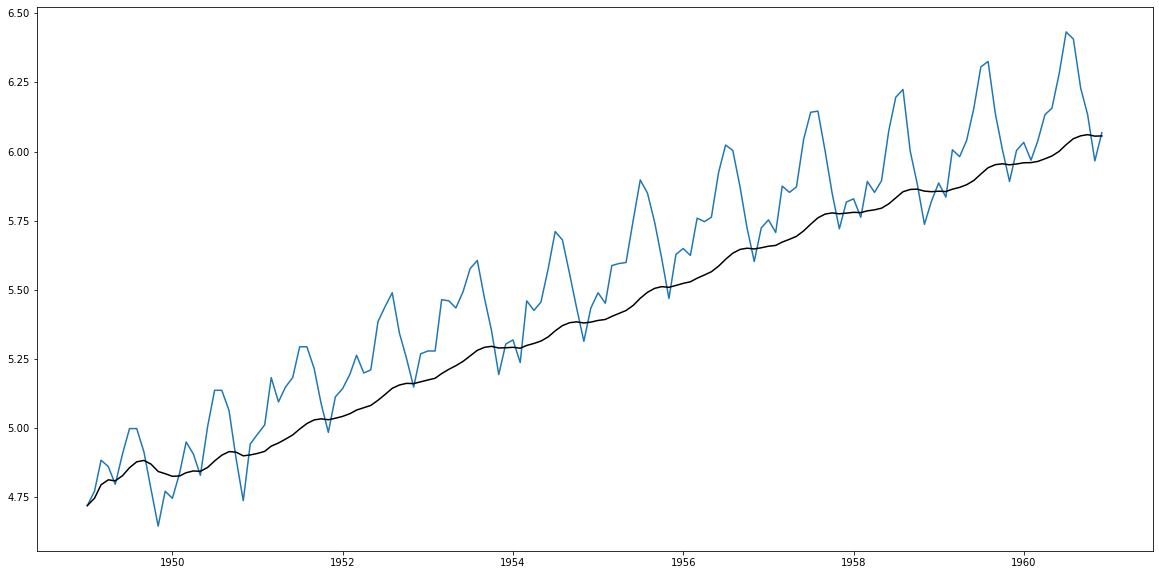

In [62]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

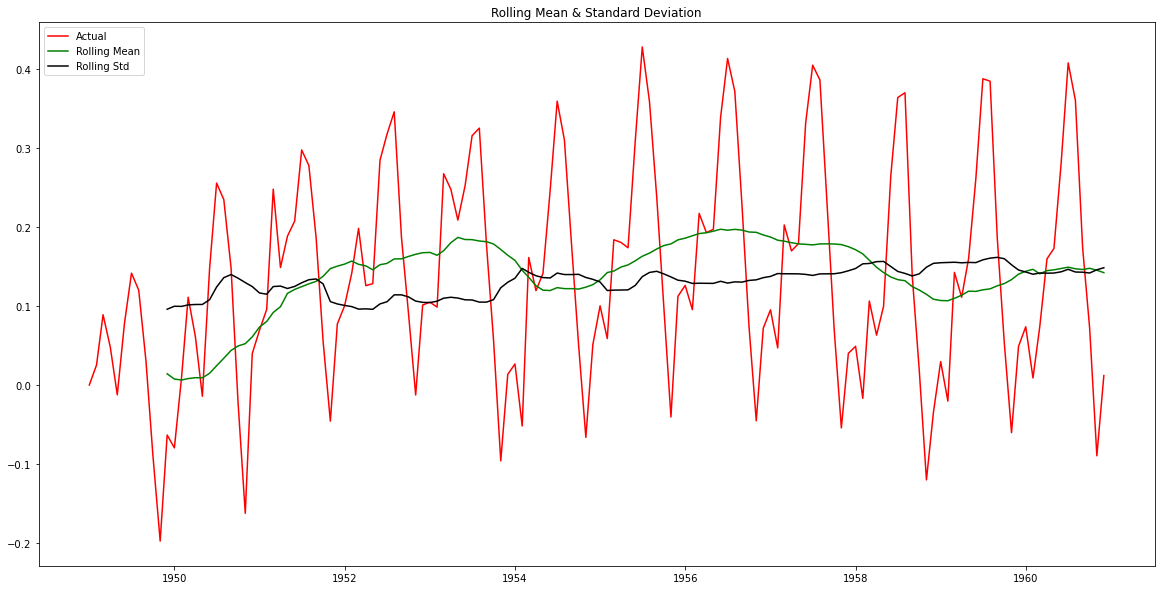

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [63]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

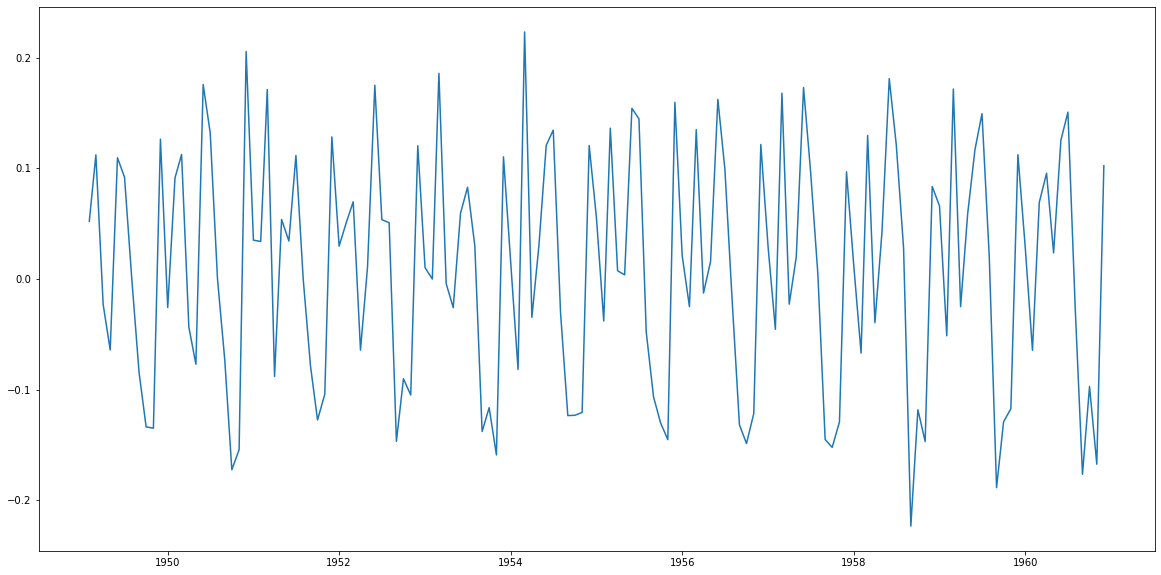

In [64]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

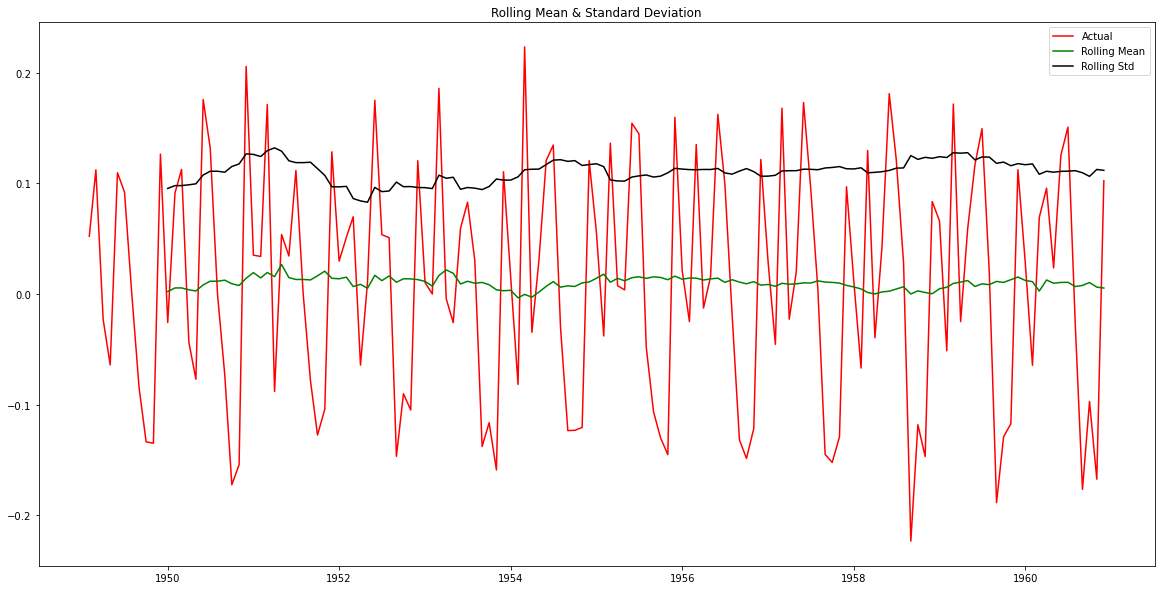

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [65]:
data_shift.dropna(inplace=True)
stationarity(data_shift)

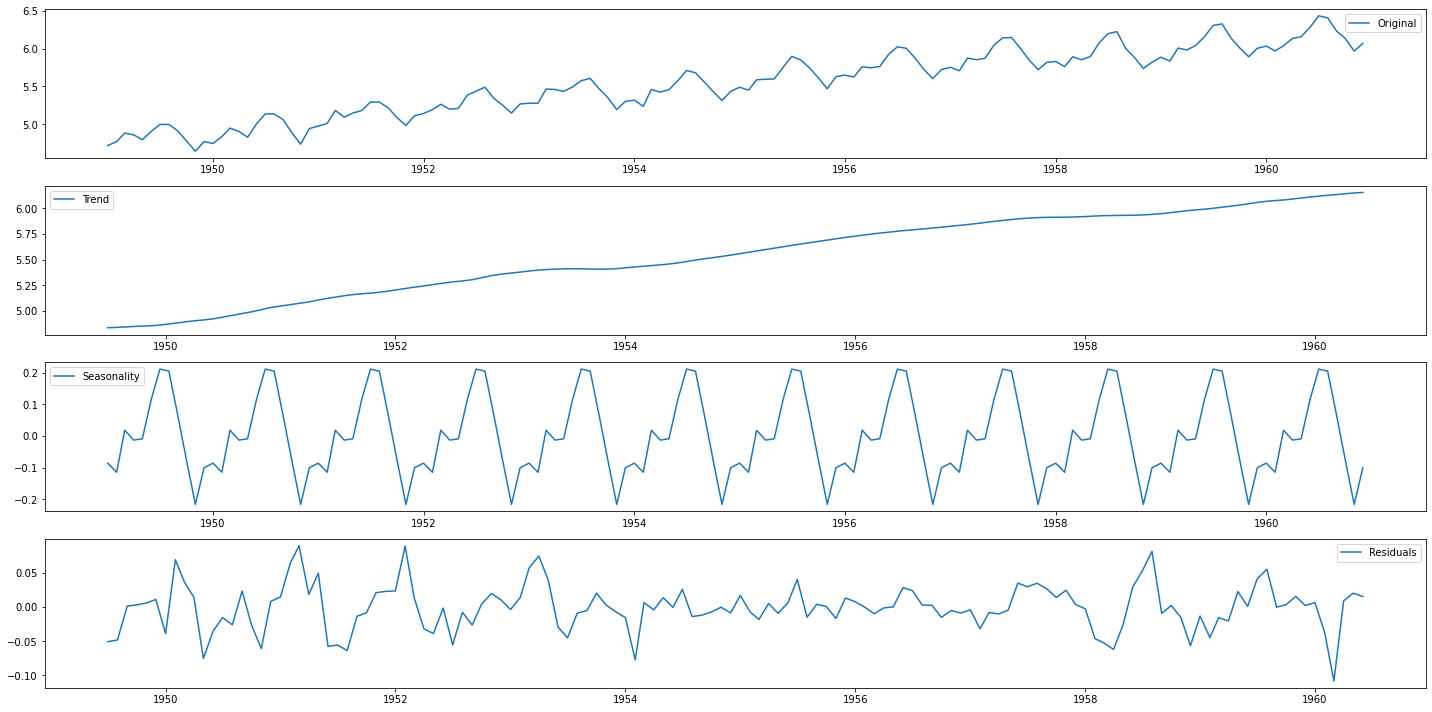

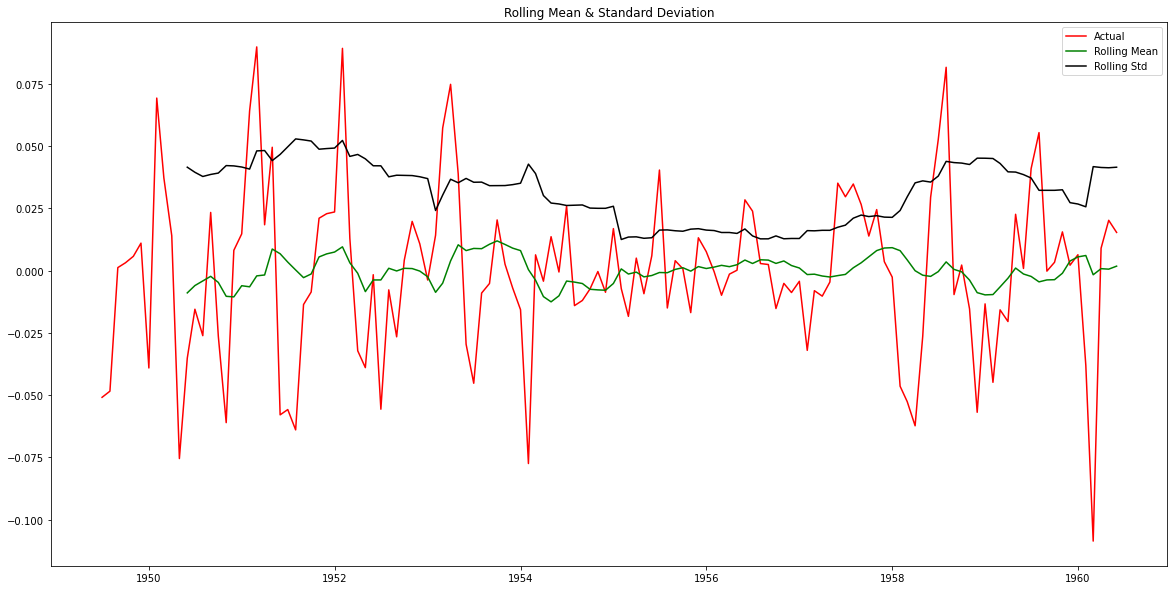

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp= seasonal_decompose(data_log)

trend= decomp.trend
seasonal= decomp.seasonal
residual= decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [ ]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Autocorrelation Function')

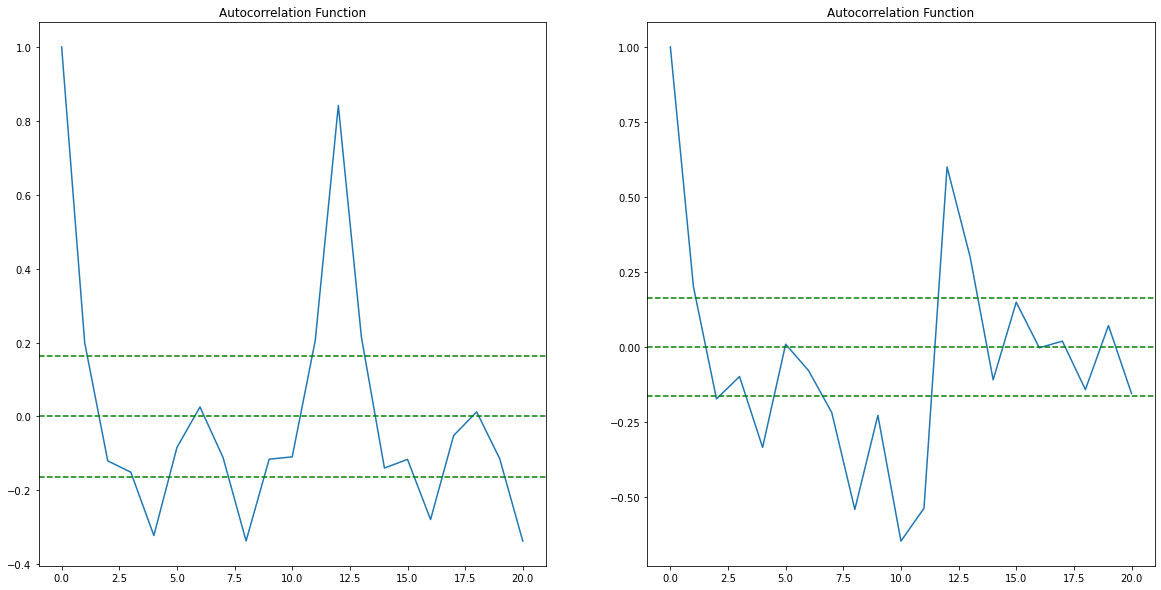

In [67]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

C:\Users\saurabh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saurabh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


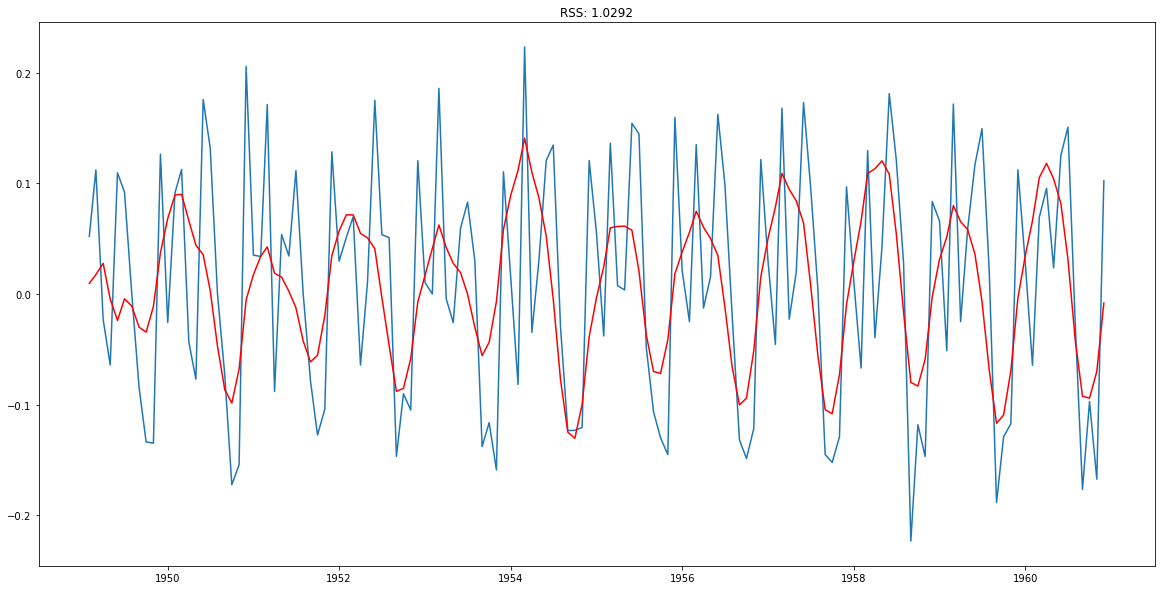

In [68]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [69]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [70]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [76]:
predictions_log=pd.Series(data_log['Passengers'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

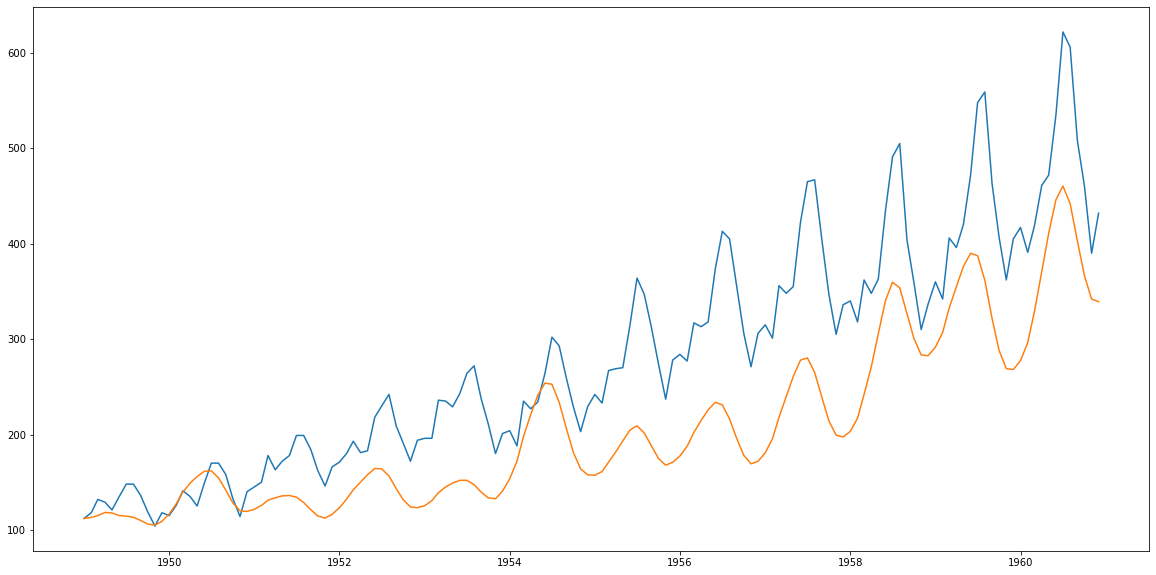

In [77]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

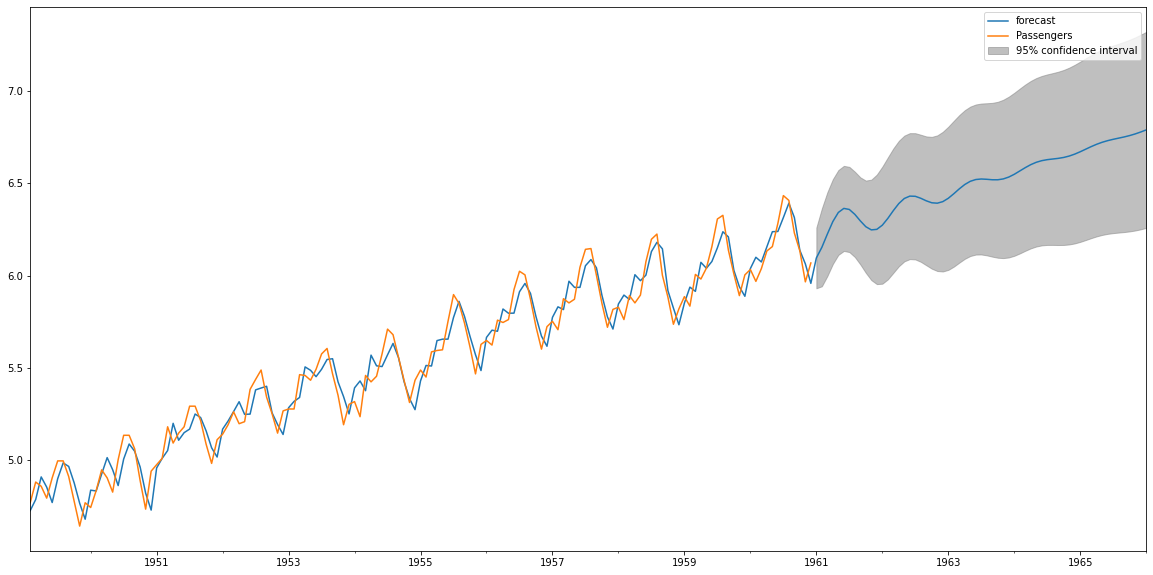

In [78]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [79]:
results.forecast(steps=120)

(array([6.09553384, 6.15281391, 6.22442954, 6.29241094, 6.34164717,
        6.3635937 , 6.35784701, 6.33139322, 6.29597558, 6.26447727,
        6.24738333, 6.25025173, 6.27275833, 6.30940308, 6.3515149 ,
        6.38988657, 6.41727388, 6.43011066, 6.42906704, 6.41842505,
        6.4045617 , 6.39403627, 6.3918309 , 6.40019507, 6.41833695,
        6.4429541 , 6.4693744 , 6.49293994, 6.51024131, 6.51989048,
        6.52267594, 6.52112403, 6.51864541, 6.51853701, 6.52311932,
        6.53322369, 6.54812878, 6.56591566, 6.5841032 , 6.60036553,
        6.61313281, 6.62192797, 6.62737805, 6.63093145, 6.63438704,
        6.63937999, 6.64696518, 6.65739854, 6.67015338, 6.68414265,
        6.69806642, 6.71077918, 6.7215775 , 6.73034002, 6.73749829,
        6.74386397, 6.75037341, 6.7578261 , 6.76668699, 6.7769984 ,
        6.78841337, 6.80032872, 6.81207214, 6.8230878 , 6.83307157,
        6.84202513, 6.85022333, 6.85811242, 6.86617361, 6.87479172,
        6.88416323, 6.89426405, 6.90487911, 6.91